# The Rebalancing Act

This notebook generates most of the visualizations used in our research paper for NYSSEF 2023.

In [1]:
import json

from gerrychain import Graph, Partition
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import shapely.geometry

from rba.util import load_districts
from rba.visualization import (visualize_graph, visualize_partition_geopandas,
                               visualize_gradient_geopandas)
from rba.district_quantification import quantify_gerrymandering

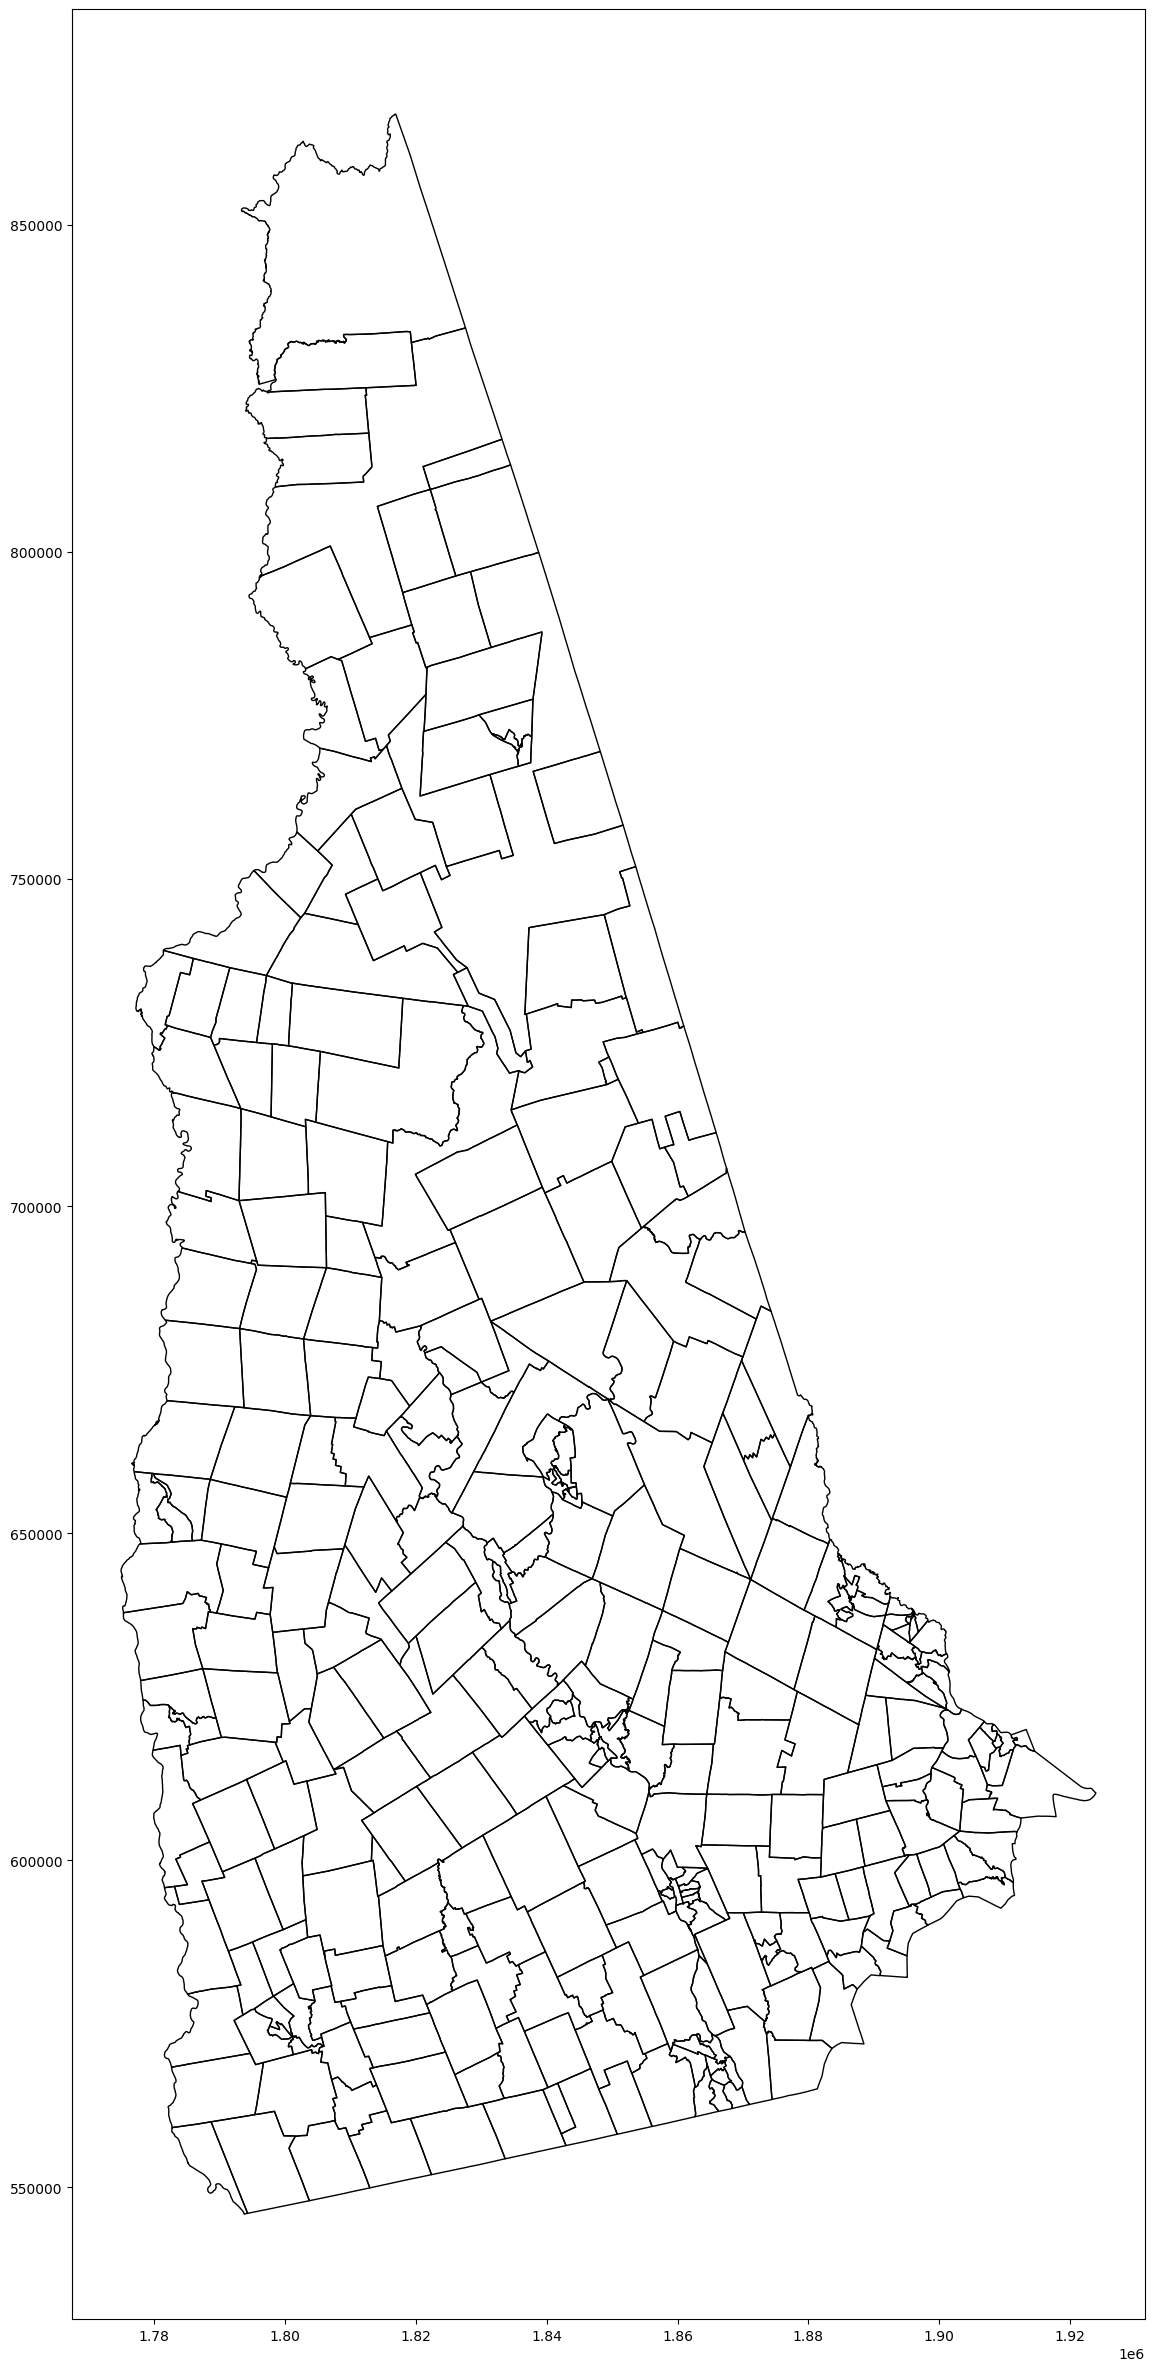

Coordinates modified
Edges drawn
Nodes drawn


<Figure size 640x480 with 0 Axes>

In [2]:
with open("../rba/data/2010/new_hampshire_geodata_merged.json", "r") as f:
    data = json.load(f)
nx_graph = nx.readwrite.json_graph.adjacency_graph(data)
graph = Graph.from_networkx(nx_graph)
del nx_graph

_, ax = plt.subplots(figsize=(15, 30))
visualize_partition_geopandas(
    Partition(graph, assignment={node: node for node in graph.nodes}),
    img_path="NH_precincts.png",
    facecolor="none",
    edgecolor="black",
    linewidth=1,
    ax=ax,
    show=True,
    clear=True
)
visualize_graph(graph, "NH_precinct_graph.png", lambda node: shapely.geometry.mapping(shapely.geometry.shape(graph.nodes[node]['geometry']).centroid)["coordinates"], node_sizes=lambda node: 15, show=False)

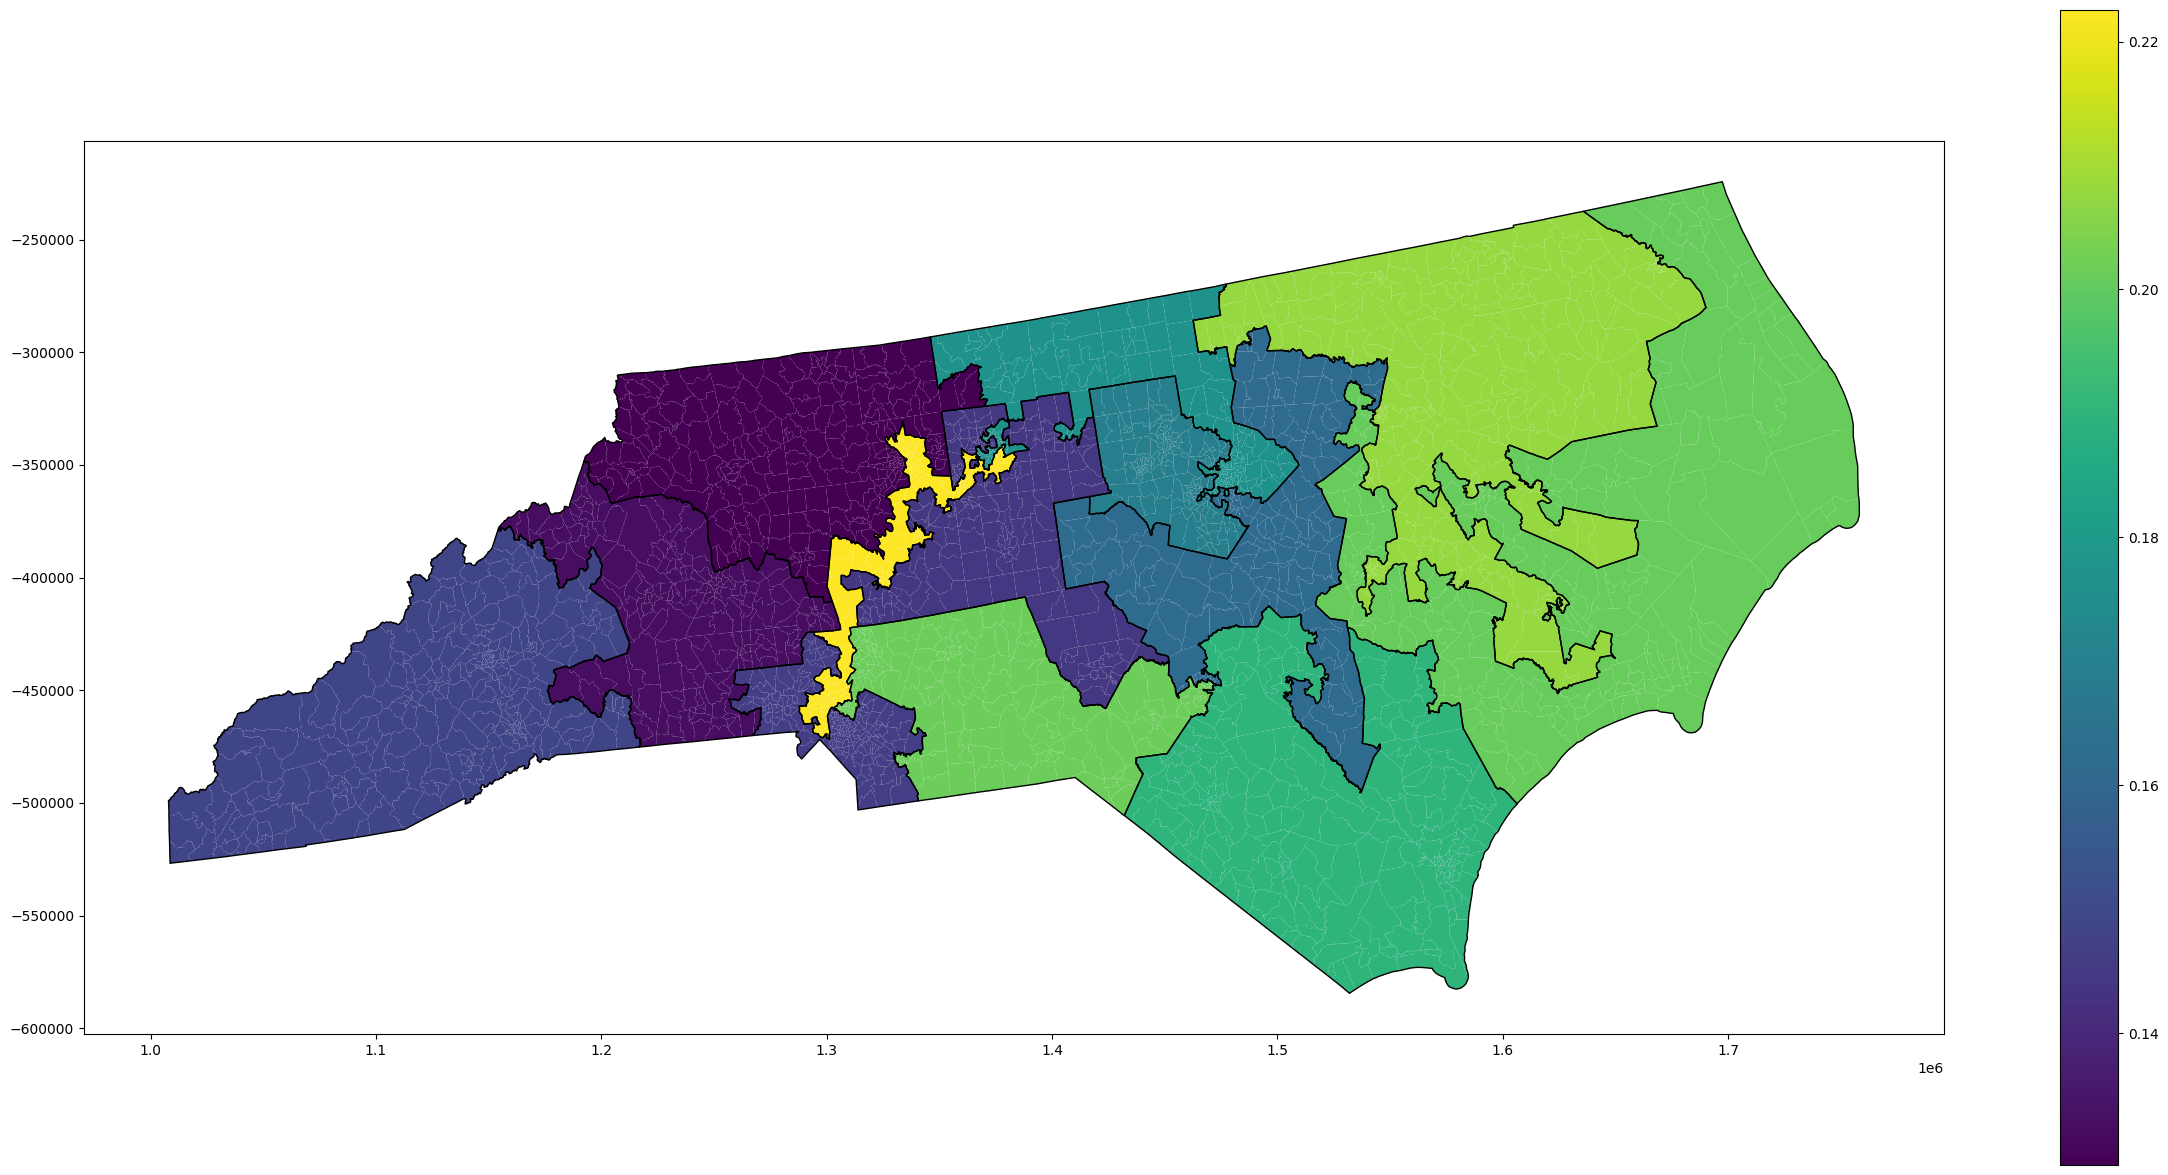

<Figure size 640x480 with 0 Axes>

In [3]:
with open("../rba/data/2010/north_carolina_geodata_merged.json", "r") as f:
    data = json.load(f)
nx_graph = nx.readwrite.json_graph.adjacency_graph(data)
graph = Graph.from_networkx(nx_graph)
del nx_graph

with open("../rba/data/2010/north_carolina_communities.json", "r") as f:
        difference_data = json.load(f)

node_differences = {}
for edge, lifetime in difference_data.items():
    u = edge.split(",")[0][2:-1]
    v = edge.split(",")[1][2:-2]
    node_differences[(u, v)] = lifetime

districts = load_districts(graph, "../rba/data/2010/north_carolina_districts_2010.json", verbose=True)
district_scores, _ = quantify_gerrymandering(graph, districts, node_differences)

assignment = {u: [d for d in districts if u in districts[d]][0] for u in graph.nodes}

_, ax = plt.subplots(figsize=(30, 15))
visualize_gradient_geopandas(
    list(graph.nodes),
    lambda u: district_scores[assignment[u]],
    lambda u: graph.nodes[u]["geometry"],
    ax=ax,
    clear=False,
    show=False,
    legend=True
)
visualize_partition_geopandas(
    Partition(graph, assignment),
    union=True,
    clear=True,
    ax=ax,
    facecolor="none",
    edgecolor="black",
    linewidth=1,
    img_path="NC_districts_diff_score.png",
    show=True
)

In [9]:
import math

df = pd.read_csv("../NC_ensemble_10000/scores.csv")
print(mean := df["state_gerry_score"].mean())
print(stdev := math.sqrt(df["state_gerry_score"].var()))

print((0.1735 - mean) / stdev)
print(df["state_gerry_score"].min())

0.17233945308072401
0.0007464414255378281
1.554772926006582
0.1697266846898864
